#计划

1.分类问题中的k近邻（k-NN）算法
2.非参数回归
3.最近邻搜索方法

##参数和非参数机器学习方法

参数化方法:
(1)假设所需的依赖具有某些特殊形式，并且精度高达某些参数
(2)参数是优化问题的解

非参数方法:
度量算法(Метрические алгоритмы)，核方法(ядерные методы)

参数模型:
如果我们对所要学习的问题有足够的认识，具备一定的先验知识，此时我们一般会假定要学习的目标函数f(x)或分布P(y|x)的具体形式。然后，通过训练数据集，基于ERM、SRM、MLE、MAP等学习策略，可以估计出f(x)或P(y|x)中含有的未知参数。一旦未知参数估计完毕，训练数据一般来说，就失去其作用了，因为这些估计出来的参数就是训练数据的浓缩。通过这种方式建立起来的模型就是参数模型。参数模型的一个很重要的特点是，如果对于模型的假设正确，那么只需要很少的训练数据就可以从假设空间中学出一个很好的模型。但是，如果模型的假设错误，那么无论训练的数据量有多大，甚至趋于无穷大，学出的模型都会与实际模型出现不可磨灭的偏差。感知机、逻辑斯特回归、高斯判别分析、朴素贝叶斯、线性支持向量机都属于参数模型。对于神经网络来说，当固定了隐层的数目以及每一层神经元的个数，它也属于参数模型。但由于隐层数目与每一层神经元个数的不确定性，很多时候，神经网络都被归类为半参数模型。

非参数模型:
当我们对所要学习的问题知之甚少，此时我们一般不会对潜在的模型做过多的假设。在面对预测任务的时候，我们通常会用上所有的训练数据。例如简单的核密度估计(KDE)的表达式中，就带有所有训练数据的信息。通过这种方式建立的模型就是非参数模型。非参数模型的一个很重要的特点就是：let the data speak for itself. 正因为如此，非参数模型的存储开销、计算开销都会比参数模型大的多。但是，由于不存在模型的错误假定问题，可以证明，当训练数据量趋于无穷大的时候，非参数模型可以逼近任意复杂的真实模型。这正是非参数模型诱人的一点。另外需要说明的一点是，非参数模型之所以叫做非参数，并不是因为模型中没有参数。实际上，非参数模型中一般会含有一个或多个超参数，外加无穷多个普通的参数。k近邻就是典型的非参数模型。

##k近邻（k-NN）算法(K-Nearest Neighbor algorithm)

###k近邻（k-NN）算法思想

k近邻算法是一种基本分类和回归方法.

算法思想：
官方解释：给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例，这K个实例的多数属于某个类，就把该输入实例分类到这个类中。
通俗理解：K个最近的邻居，当K=1时，算法便成了最近邻算法，即寻找最近的那个邻居。为何要找邻居？打个比方来说，假设你来到一个陌生的村庄，现在你要找到与你有着相似特征的人群融入他们，所谓入伙。

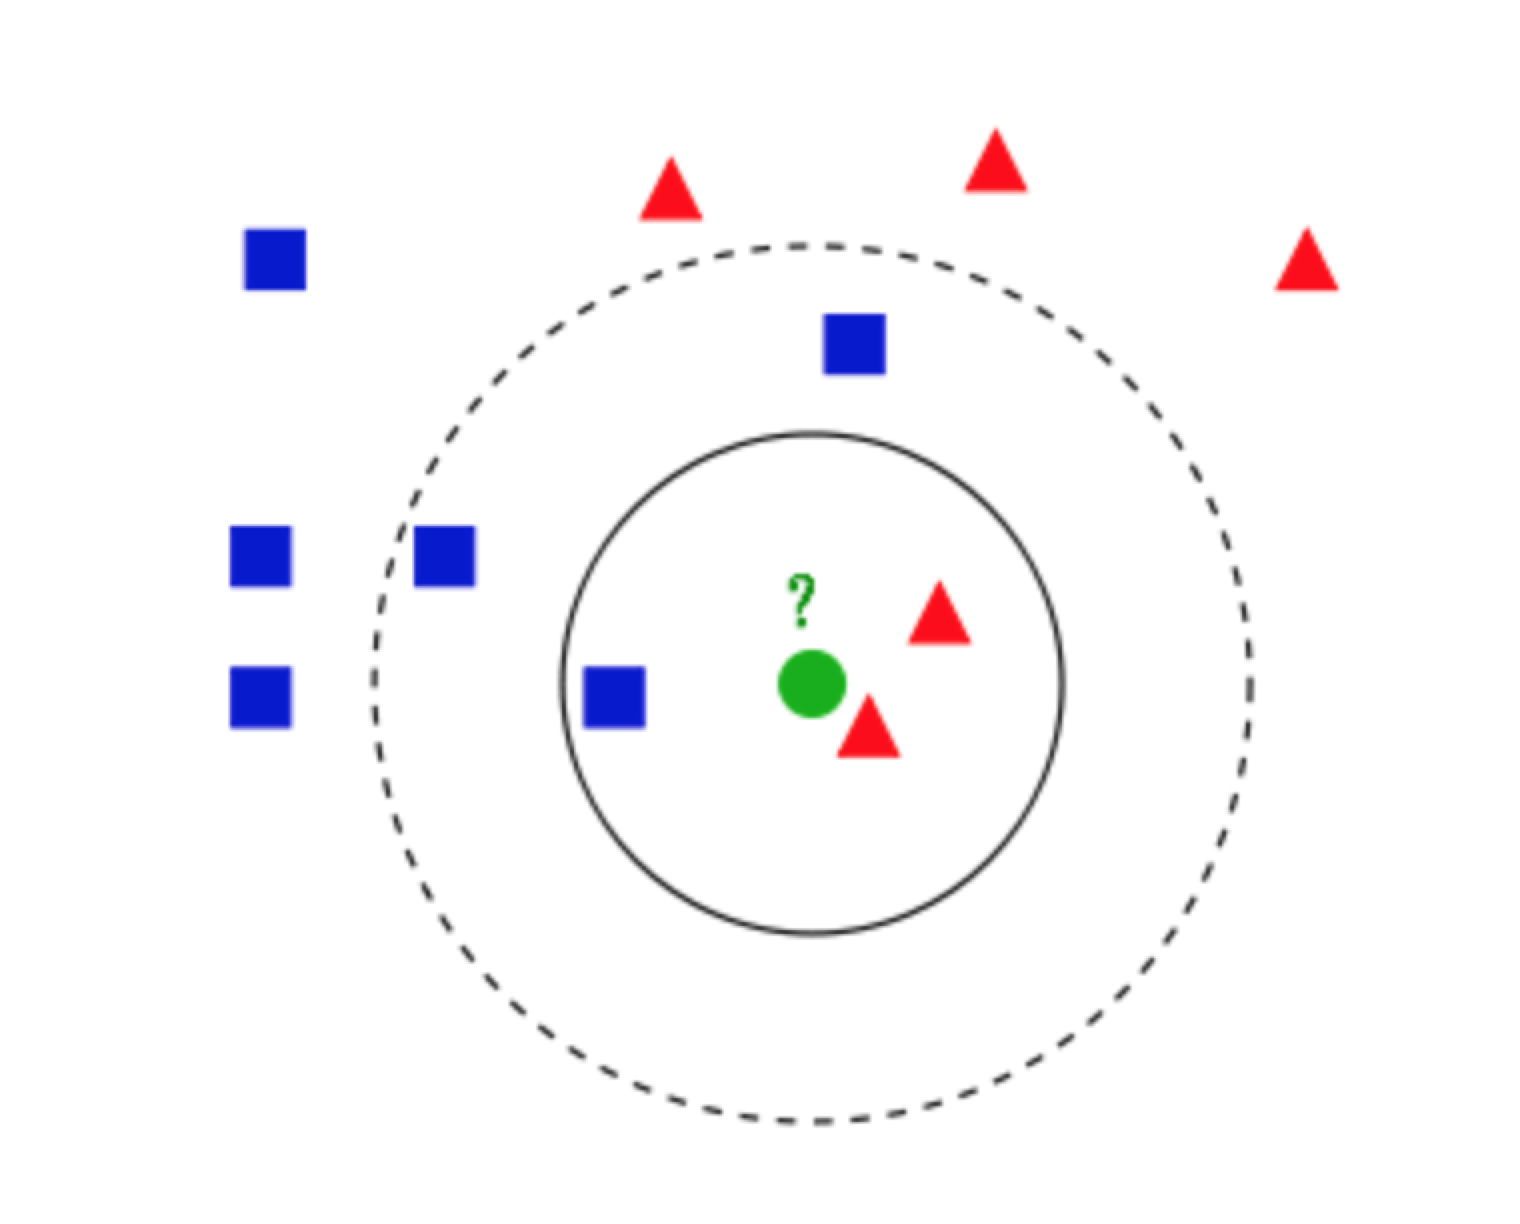
如上图所示，有两类不同的样本数据，分别用蓝色的小正方形和红色的小三角形表示，而图正中间的那个绿色的圆所标示的数据则是待分类的数据。也就是说，现在，我们不知道中间那个绿色的数据是从属于哪一类（蓝色小正方形or红色小三角形），下面，我们就要解决这个问题：给这个绿色的圆分类。
    
我们常说，物以类聚，人以群分，判别一个人是一个什么样品质特征的人，常常可以从他/她身边的朋友入手，所谓观其友，而识其人。我们不是要判别上图中那个绿色的圆是属于哪一类数据么，好说，从它的邻居下手。但一次性看多少个邻居呢？从上图中，你还能看到：

如果K=3，绿色圆点的最近的3个邻居是2个红色小三角形和1个蓝色小正方形，少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于红色的三角形一类。
如果K=5，绿色圆点的最近的5个邻居是2个红色三角形和3个蓝色的正方形，还是少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于蓝色的正方形一类。
    
于此我们看到，当无法判定当前待分类点是从属于已知分类中的哪一类时，我们可以依据统计学的理论看它所处的位置特征，衡量它周围邻居的权重(它最近的k个实例，哪个类别最多即可)，而把它归为(或分配)到权重更大的那一类。这就是K近邻算法的核心思想。

###k近邻（k-NN）算法距离度量（k）的选取

K近邻算法的核心在于找到实例点的邻居，这个时候，问题就接踵而至了，如何找到邻居，邻居的判定标准是什么，用什么来度量。这一系列问题便是下面要讲的距离度量表示法。会不会有这样的疑问，我是要找邻居，找相似性，怎么又跟距离扯上关系了？

这是因为特征空间中两个实例点的距离可以反应出两个实例点之间的相似性程度。K近邻模型的特征空间一般是n维实数向量空间，使用的距离可以使欧式距离，也是可以是其它距离。

1.选取k值以及它的影响

k近邻的k值我们应该怎么选取呢？

如果我们选取较小的k值，那么就会意味着我们的整体模型会变得复杂，容易发生过拟合！恩~结论说完了，太抽象了吧你，不上图讲解号称通俗讲解的都是流氓~好吧，那我就上图来讲解

假设我们选取k=1这个极端情况，怎么就使得模型变得复杂，又容易过拟合了呢？

假设我们有训练数据和待分类点如下图：

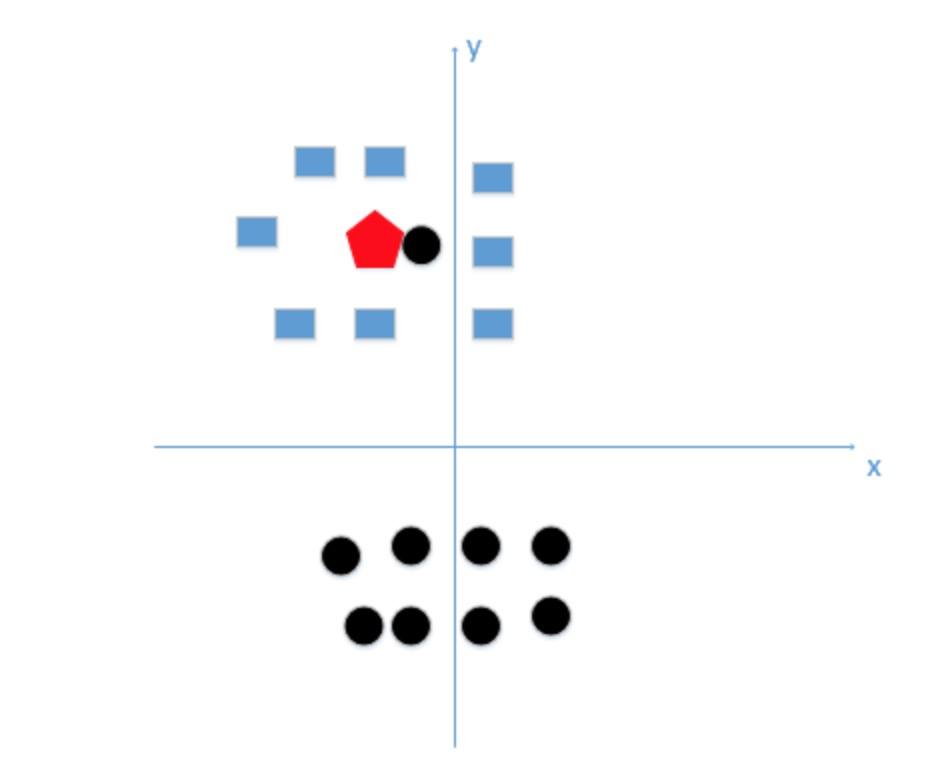

上图中有俩类，一个是黑色的圆点，一个是蓝色的长方形，现在我们的待分类点是红色的五边形。

好，根据我们的k近邻算法步骤来决定待分类点应该归为哪一类。我们由图中可以得到，很容易我们能够看出来五边形离黑色的圆点最近，k又等于1，那太好了，我们最终判定待分类点是黑色的圆点。

由这个处理过程我们很容易能够感觉出问题了，如果k太小了，比如等于1，那么模型就太复杂了，我们很容易学习到噪声，也就非常容易判定为噪声类别，而在上图，如果，k大一点，k等于8，把长方形都包括进来，我们很容易得到我们正确的分类应该是蓝色的长方形！如下图：

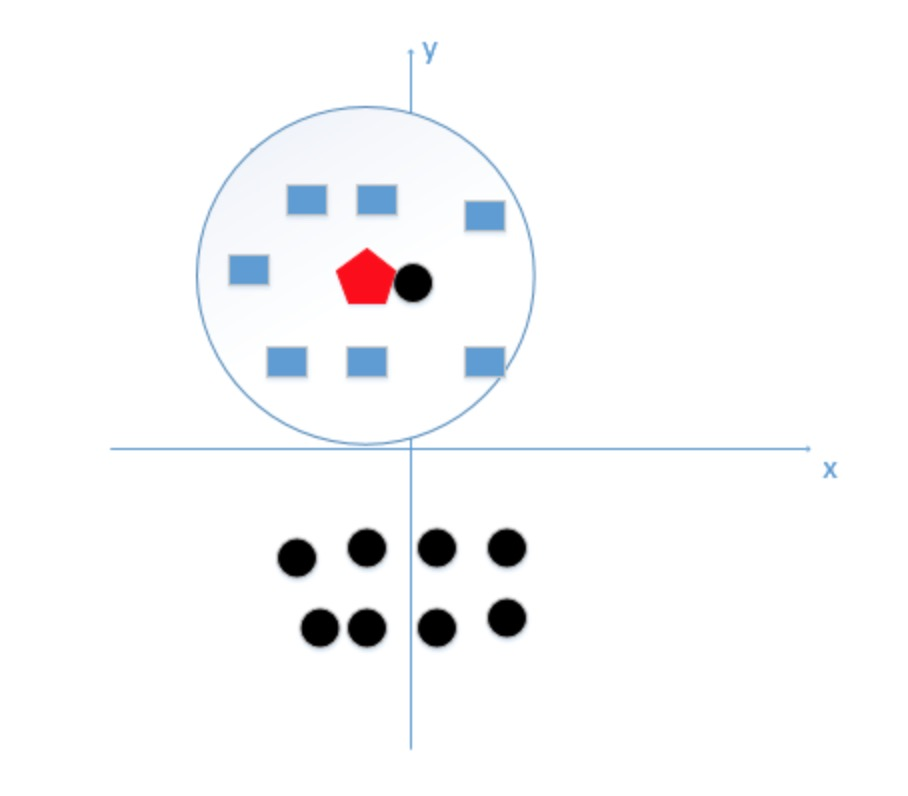

所谓的过拟合就是在训练集上准确率非常高，而在测试集上准确率低，经过上例，我们可以得到k太小会导致过拟合，很容易将一些噪声（如上图离五边形很近的黑色圆点）学习到模型中，而忽略了数据真实的分布！

如果我们选取较大的k值，就相当于用较大邻域中的训练数据进行预测，这时与输入实例较远的（不相似）训练实例也会对预测起作用，使预测发生错误，k值的增大意味着整体模型变得简单。

k值增大怎么就意味着模型变得简单了，不要急，我会解释的！哈哈。

我们想，如果k=N（N为训练样本的个数）,那么无论输入实例是什么，都将简单地预测它属于在训练实例中最多的类。这时，模型是不是非常简单，这相当于你压根就没有训练模型呀！直接拿训练数据统计了一下各个数据的类别，找最大的而已！这好像下图所示：

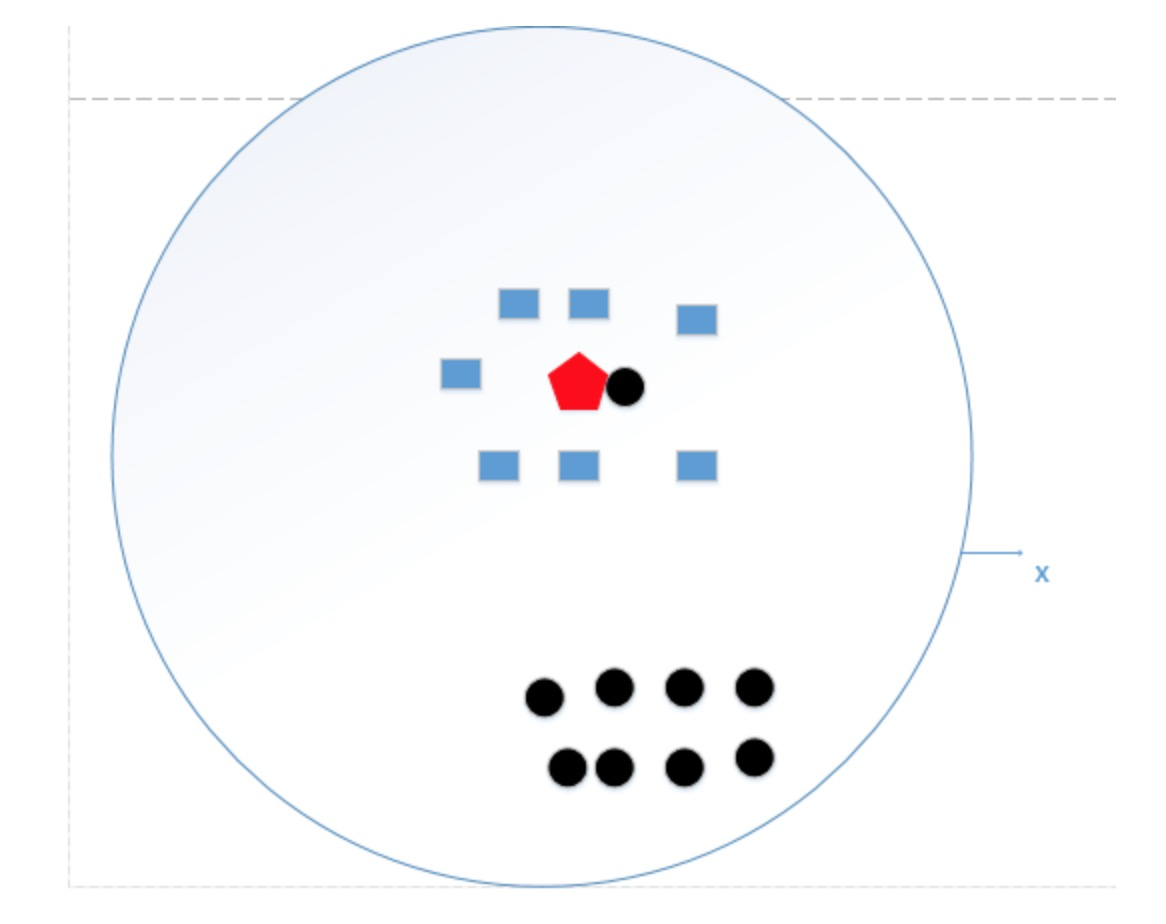

我们统计了黑色圆形是8个，长方形个数是7个，那么哈哈，如果k=N，我就得出结论了，红色五边形是属于黑色圆形的（明显是错误的好不，捂脸！）
这个时候，模型过于简单，完全忽略训练数据实例中的大量有用信息，是不可取的。

恩，k值既不能过大，也不能过小，在我举的这个例子中，我们k值的选择，在下图红色圆边界之间这个范围是最好的，如下图：

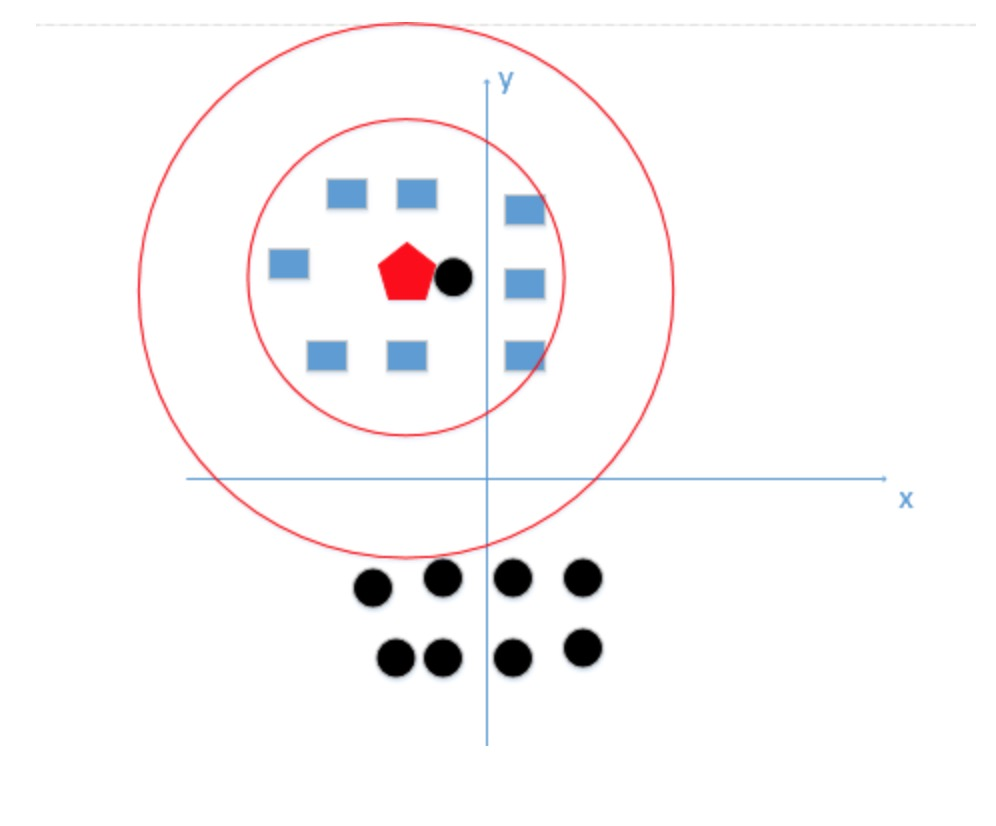

（注：这里只是为了更好让大家理解，真实例子中不可能只有俩维特征，但是原理是一样的1，我们就是想找到较好的k值大小）

那么我们一般怎么选取呢？李航博士书上讲到，我们一般选取一个较小的数值，通常采取 交叉验证法来选取最优的k值。（也就是说，选取k值很重要的关键是实验调参，类似于神经网络选取多少层这种，通过调整超参数来得到一个较好的结果）


